-> Chargement des librairies et fonctions

In [2]:
# #Montage Drive

# from google.colab import drive
# import sys

# drive.mount('/content/gdrive')

# my_local_drive = "/content/gdrive/MyDrive/Perso/Etudes/Master\ ICo/Colab\ Notebooks/"
# # Ajout du path pour les librairies, fonctions et données
# sys.path.append(my_local_drive)
# # Se positionner sur le répertoire associé
# %cd $my_local_drive
# %pwd 

# fonctions utilities (affichage, confusion, etc.)
from MyNLPUtilities import *
# fonctions utilities (fonction de clean, import etc etc)
from Fonction.myFonction import *

from Fonction.AllModels import *


[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


-> Chargement des données brutes

In [3]:
# Init_train = pd.read_csv('./Data_brut/HAI817_Projet_train.csv', sep=",")
# Init_test = pd.read_csv('./Data_brut/HAI817_Projet_test.csv', sep=",")
# data_brute = pd.concat([Init_train,Init_test], ignore_index = True)
# data_brute = data_brute.drop_duplicates()
# print(data_brute['our rating'].value_counts())
# data_equilibre = balanceSample(data_brute,150,["false","true","mixture","other"])
# print(data_equilibre['our rating'].value_counts())
# data_equilibre.to_csv('./Data_equilibre/MyData_Sprint1.csv', sep=',', index=False)
mySample = pd.read_csv('./data_csv/balanced_concat.csv')

print(mySample['our rating'].value_counts())
X_train = mySample['text']
y_train = mySample['our rating']

True     500
False    500
Name: our rating, dtype: int64


-> Je test tout les models

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Evaluation de  MultinomialNB
MultinomialNB : 0.758 (0.065) in 2.072 s
Evaluation de  LR
LR : 0.784 (0.049) in 19.481 s
Evaluation de  KNN
KNN : 0.668 (0.041) in 5.990 s
Evaluation de  CART
CART : 0.708 (0.027) in 26.919 s
Evaluation de  RF
RF : 0.794 (0.037) in 31.376 s
Evaluation de  SVM
SVM : 0.820 (0.029) in 239.030 s

Le meilleur resultat : 
Classifier :  SVM  accuracy : 0.820  (0.029)  en 239.030   s

Tous les résultats : 

Classifier :  SVM  accuracy : 0.820  (0.029)  en 239.030   s
Classifier :  RF  accuracy : 0.794  (0.037)  en 31.376   s
Classifier :  LR  accuracy : 0.784  (0.049)  en 19.481   s
Classifier :  MultinomialNB  accuracy : 0.758  (0.065)  en 2.072   s
Classifier :  CART  accuracy : 0.708  (0.027)  en 26.919   s
Classifier :  KNN  accuracy : 0.668  (0.041)  en 5.990   s


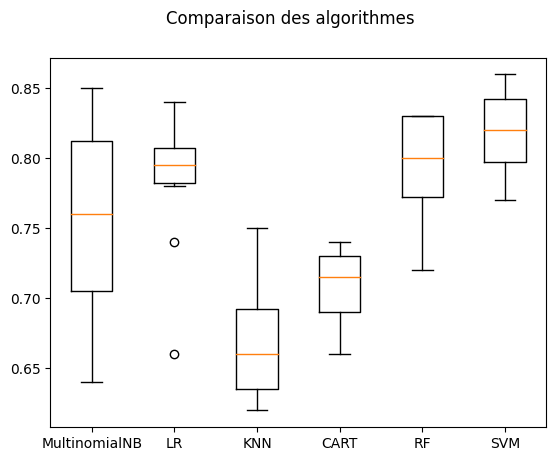

In [ ]:
testAllModel(X_train,y_train,5)

-> je test les hyper-parametres de SVC

In [ ]:
testSVC(X_train,y_train)

Application de gridsearch ...
pipeline : ['tfidf', 'svm']
parameters :
{'svm__C': [0.001, 0.01, 0.1, 1, 10], 'svm__gamma': [0.001, 0.01, 0.1, 1], 'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
Fitting 5 folds for each of 80 candidates, totalling 400 fits
réalisé en  93.254 s
Meilleur résultat : 0.483
Ensemble des meilleurs paramètres :
	svm__C: 10
	svm__gamma: 0.001
	svm__kernel: 'linear'

Les premiers résultats : 
     svm__C  svm__gamma svm__kernel  accuracy
77    10.0       1.000         rbf  0.483333
76    10.0       1.000      linear  0.483333
72    10.0       0.100      linear  0.483333
68    10.0       0.010      linear  0.483333
64    10.0       0.001      linear  0.483333


-> Ajuster pretraitement

In [ ]:
ajustSVC(X_train, y_train,[10],[1],['rbf','linear'])

[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     certificate has expired (_ssl.c:997)>


Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'svm__C': [10], 'svm__gamma': [1], 'svm__kernel': ['rbf', 'linear']}
Fitting 5 folds for each of 32 candidates, totalling 160 fits
réalisé en  124.755 s
Meilleur résultat : 0.488
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: True
	cleaner__removedigit: False
	svm__C: 10
	svm__gamma: 1
	svm__kernel: 'rbf'
	tfidf__lowercase: False
	tfidf__stop_words: None

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  svm__C  svm__gamma  \
11                       True                 False      10           1   
3                        True                  True      10           1   
25                      False                 False      10           1   
17                      False                  True      

-> enregistrement du modele SVC

Sauvegarde du modèle dans  ./Modele/Sprint1/SentimentModel_Sprint1.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(getlemmatisation=True)),
                ('tfidf', TfidfVectorizer(lowercase=False)),
                ('svm', SVC(C=10, gamma=1))])
Accuracy : 0.433
Classification Report
              precision    recall  f1-score   support

       false    0.40000   0.30769   0.34783        13
     mixture    0.27778   0.33333   0.30303        15
       other    0.71429   0.71429   0.71429        14
        true    0.38889   0.38889   0.38889        18

    accuracy                        0.43333        60
   macro avg    0.44524   0.43605   0.43851        60
weighted avg    0.43944   0.43333   0.43445        60



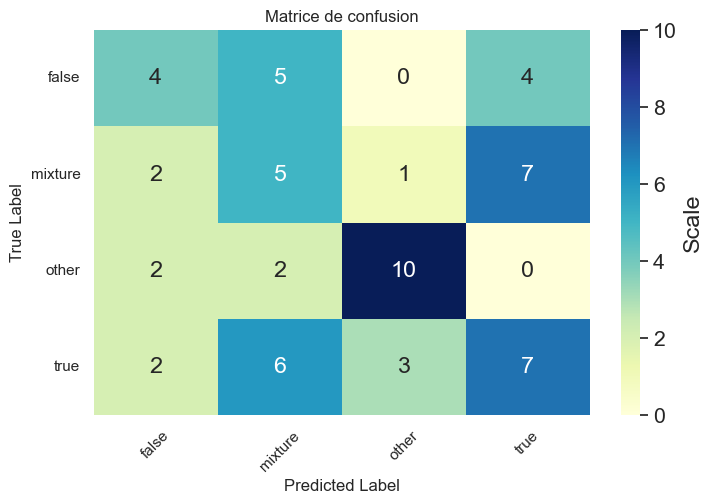

In [ ]:
from sklearn.model_selection import train_test_split
import pickle
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30

train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=True)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words=None)),
    ('svm', SVC(C=10, gamma=1, kernel='rbf'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/Sprint1/SentimentModel_Sprint1.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))


print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

-> Second Modèle

In [ ]:
testRFC(X_train,y_train)

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'rfc__n_estimators': [500, 1200], 'rfc__max_depth': [25, 30], 'rfc__min_samples_split': [5, 10, 15], 'rfc__min_samples_leaf': [1, 2]}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
réalisé en  1311.830 s
Meilleur résultat : 0.793
Ensemble des meilleurs paramètres :
	rfc__max_depth: 30
	rfc__min_samples_leaf: 1
	rfc__min_samples_split: 10
	rfc__n_estimators: 1200

Les premiers résultats : 
     rfc__max_depth  rfc__min_samples_leaf  rfc__min_samples_split  \
15              30                      1                      10   
1               25                      1                       5   
17              30                      1                      15   
12              30                      1                       5   
4               25                      1                      15   

    rfc__n_estimators  accuracy  
15               1200     0.793  
1                1200     

In [7]:
ajustRFC(X_train, y_train,[1200],[30,25],[10,5],[1])

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'rfc__n_estimators': [1200], 'rfc__max_depth': [30, 25], 'rfc__min_samples_split': [10, 5], 'rfc__min_samples_leaf': [1]}
Fitting 5 folds for each of 64 candidates, totalling 320 fits
réalisé en  629.748 s
Meilleur résultat : 0.794
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: True
	cleaner__removedigit: True
	rfc__max_depth: 25
	rfc__min_samples_leaf: 1
	rfc__min_samples_split: 10
	rfc__n_estimators: 1200
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  rfc__max_depth  \
9                        True                  True              25   
11                       True                  True              25   
57                      False            

Sauvegarde du modèle dans  ./Sprint1/RandomForestClassifier_Sprint1.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner',
                 TextNormalizer(getlemmatisation=True, removedigit=True)),
                ('tfidf', TfidfVectorizer()),
                ('rfc',
                 RandomForestClassifier(max_depth=25, min_samples_split=10,
                                        n_estimators=1200))])
Accuracy : 0.790
Classification Report
              precision    recall  f1-score   support

       False    0.80000   0.78431   0.79208        51
        True    0.78000   0.79592   0.78788        49

    accuracy                        0.79000       100
   macro avg    0.79000   0.79012   0.78998       100
weighted avg    0.79020   0.79000   0.79002       100



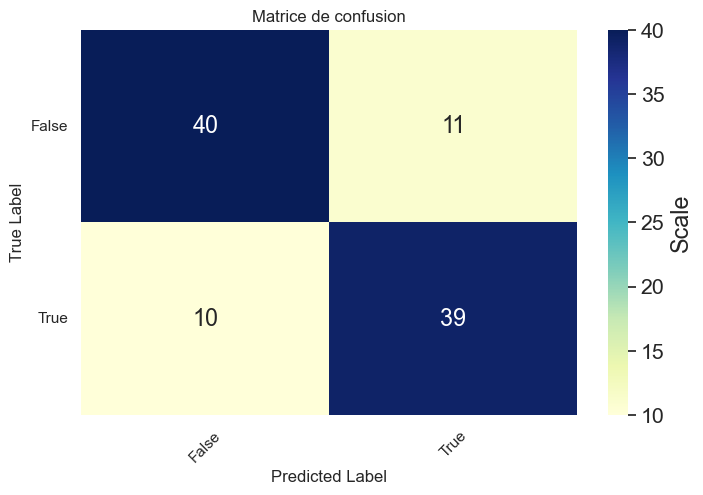

In [17]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=True)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('rfc', RandomForestClassifier(max_depth=25,min_samples_leaf=1, min_samples_split=10, n_estimators=1200))
])
pipeline.fit(train_title,train_note)
filename='./Sprint1/RandomForestClassifier_Sprint1.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

-> Le dernier modele

In [10]:
testLR(X_train,y_train)

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'lr__penalty': ['l2'], 'lr__C': [100, 10, 1.0, 0.1, 0.01]}
Fitting 5 folds for each of 15 candidates, totalling 75 fits
réalisé en  61.515 s
Meilleur résultat : 0.824
Ensemble des meilleurs paramètres :
	lr__C: 10
	lr__penalty: 'l2'
	lr__solver: 'newton-cg'

Les premiers résultats : 
    lr__C lr__penalty lr__solver  accuracy
3   10.0          l2  newton-cg     0.824
4   10.0          l2      lbfgs     0.824
0  100.0          l2  newton-cg     0.823
1  100.0          l2      lbfgs     0.823
2  100.0          l2  liblinear     0.822


In [14]:
ajustLR(X_train, y_train,['lbfgs', 'newton-cg'],['l2'],[10])

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'lr__solver': ['lbfgs', 'newton-cg'], 'lr__penalty': ['l2'], 'lr__C': [10]}
Fitting 5 folds for each of 32 candidates, totalling 160 fits
réalisé en  131.842 s
Meilleur résultat : 0.824
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: False
	lr__C: 10
	lr__penalty: 'l2'
	lr__solver: 'lbfgs'
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  lr__C lr__penalty  \
29                      False                 False     10          l2   
25                      False                 False     10          l2   
21                      False                  True     10          l2   
17                      False                  True

Sauvegarde du modèle dans  ./Sprint1/LogisticRegression_Sprint1.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer()), ('tfidf', TfidfVectorizer()),
                ('lr', LogisticRegression(C=10))])
Accuracy : 0.830
Classification Report
              precision    recall  f1-score   support

       False    0.82692   0.84314   0.83495        51
        True    0.83333   0.81633   0.82474        49

    accuracy                        0.83000       100
   macro avg    0.83013   0.82973   0.82985       100
weighted avg    0.83006   0.83000   0.82995       100



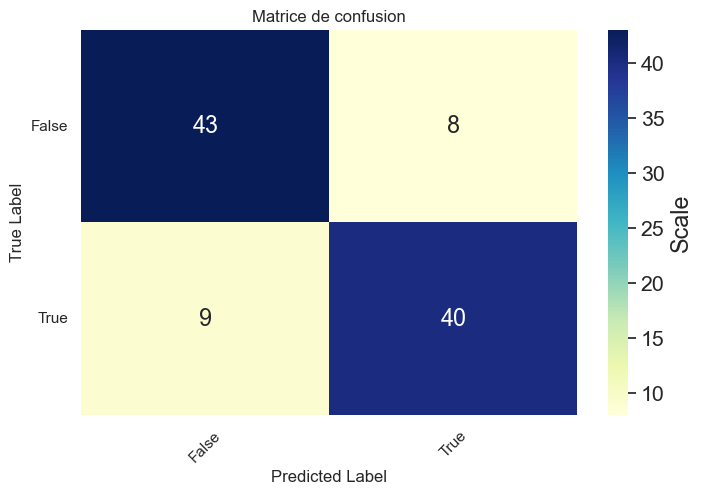

In [4]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('lr', LogisticRegression(C=10,penalty='l2', solver='lbfgs'))
])
pipeline.fit(train_title,train_note)
filename='./Sprint1/LogisticRegression_Sprint1.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)